DATA CREATION

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 300

df = pd.DataFrame({
    'Math': np.random.normal(70, 10, n),
    'Science': np.random.normal(72, 12, n),
    'English': np.random.normal(65, 9, n),
    'History': np.random.normal(68, 11, n),
    'Attendance (%)': np.random.uniform(75, 100, n),
    'Extra_Curricular_Score': np.random.normal(50, 15, n)
})

# Inject correlations
df['Science'] += 0.3 * df['Math']
df['English'] += 0.2 * df['History']
df['Extra_Curricular_Score'] -= 0.2 * df['Math']
df.to_csv("student_performance.csv", index=False)


## Tasks:

1. Calculate correlation matrix and visualize it using a heatmap.

2. Identify the strongest positive and strongest negative correlations.

3. Based on the heatmap:

    - What might be the best predictor of academic performance?

    - Do extra activities interfere or complement academics?

4. Show how removing one feature changes the correlation matrix.



In [2]:
df.head()

,Math,Science,English,History,Attendance (%),Extra_Curricular_Score
0,74.967142,84.542202,86.223979,72.055406,76.085313,39.617672
1,68.617357,85.863035,69.435167,63.673273,90.828784,48.512587
2,76.476885,103.910589,86.489692,68.316193,98.785084,47.611725
3,85.230299,104.893533,93.613335,82.062970,90.040296,24.207779
4,67.658466,92.046721,82.741332,70.102090,95.479721,33.961481


In [3]:
df.describe()

,Math,Science,English,History,Attendance (%),Extra_Curricular_Score
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,69.944514,92.725475,79.556168,69.082106,87.305273,37.769457
std,9.841937,11.794733,9.221355,11.107949,7.306131,14.969406
min,37.587327,59.739377,50.971865,36.141191,75.275782,-9.394426
25%,63.167541,84.544723,73.039634,61.882569,80.693098,27.956684
50%,70.592195,92.825832,79.554720,69.816722,87.421629,38.022725
75%,76.266577,100.421898,85.503191,76.243646,93.436310,47.470855
max,108.527315,129.152599,104.168045,94.837276,99.917421,82.468613


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Math                    300 non-null    float64
 1   Science                 300 non-null    float64
 2   English                 300 non-null    float64
 3   History                 300 non-null    float64
 4   Attendance (%)          300 non-null    float64
 5   Extra_Curricular_Score  300 non-null    float64
dtypes: float64(6)
memory usage: 14.2 KB


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

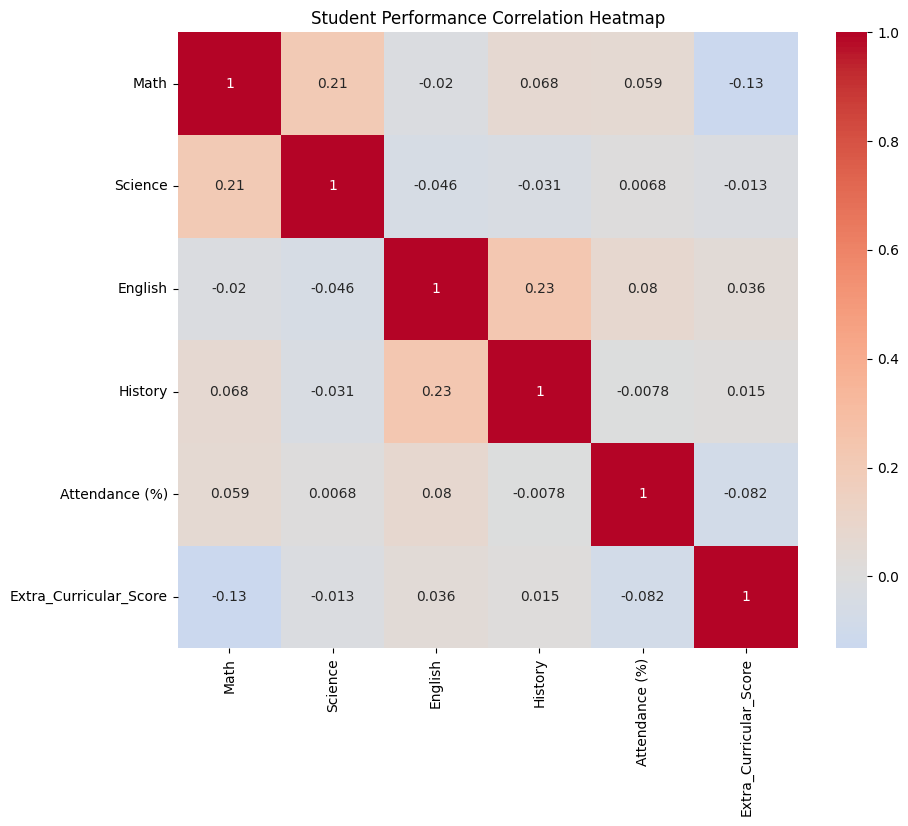

In [7]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Student Performance Correlation Heatmap")
plt.show()

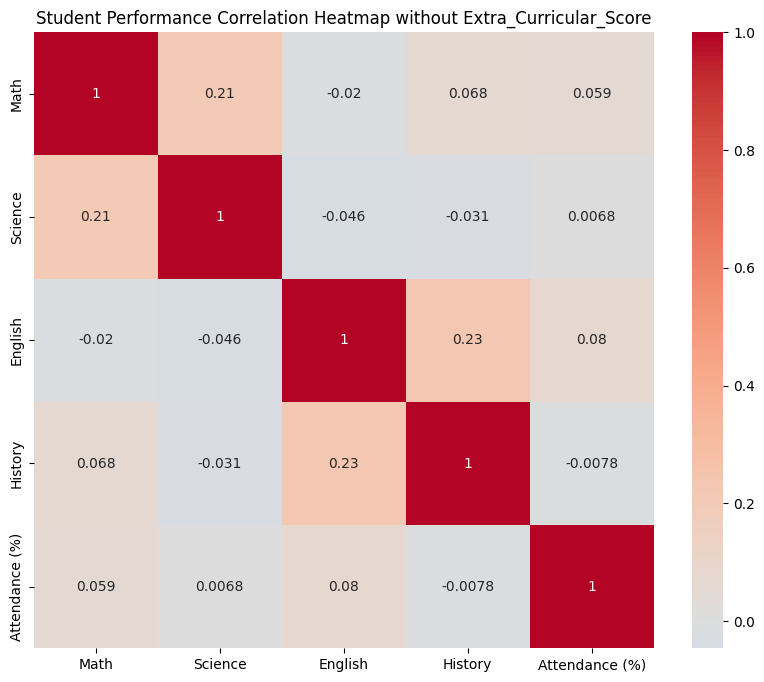

In [8]:
df_rm = df.drop(columns=['Extra_Curricular_Score'])

corr = df_rm.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Student Performance Correlation Heatmap without Extra_Curricular_Score")
plt.show()

In [10]:
df['Average_Grade'] = df[['Math', 'Science', 'English', 'History']].mean(axis=1)
df.head()

,Math,Science,English,History,Attendance (%),Extra_Curricular_Score,Average_Grade
0,74.967142,84.542202,86.223979,72.055406,76.085313,39.617672,79.447182
1,68.617357,85.863035,69.435167,63.673273,90.828784,48.512587,71.897208
2,76.476885,103.910589,86.489692,68.316193,98.785084,47.611725,83.798340
3,85.230299,104.893533,93.613335,82.062970,90.040296,24.207779,91.450034
4,67.658466,92.046721,82.741332,70.102090,95.479721,33.961481,78.137152


In [11]:
correlations = df.corr()['Average_Grade'].sort_values(ascending=False)
print(correlations)


Average_Grade             1.000000
History                   0.586764
Science                   0.566980
Math                      0.558131
English                   0.478251
Attendance (%)            0.056915
Extra_Curricular_Score   -0.041141
Name: Average_Grade, dtype: float64
